<h1> Random Forest algorithm with 2 groups </h1>

This notebook can be used to train a random forest model based on an input data matrix (X) and an output vector (y).

<h3> Load python packages </h3>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3> Load the datasets </h3>
<b> Note: </b> For now this notebook assumes the input data (X) and the output variable (y) are in the same txt file. We will use a second step to build the X matrix and y vector as input to our model.

<h4> Specify the path of the file </h4>

In [2]:
path_to_file='C:/Users/tkuijpe1/Downloads/testJesse2.csv'

In [3]:
data_set=pd.read_csv(path_to_file,sep=',')

<h4> Check if the data is loaded correcty </h4>

In [4]:
data_set.head()

,Condition,ImageNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,AreaShape_MinFeretDiameter,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number,Parent_Nuclei
0,NC,13,1498,4131,371,87,320,6,347.143525,44.004005,...,26.095121,22.956607,22.534677,236.622366,0.752008,347.143525,44.004005,0,1,1
1,NC,13,5769,13736,652,136,551,0,601.668053,72.405963,...,68.308755,59.043138,-32.701535,845.033621,0.721576,601.668053,72.405963,0,2,2
2,NC,13,1219,2975,562,117,477,82,521.388023,101.620181,...,28.008654,21.905340,-81.027292,243.858910,0.577999,521.388023,101.620181,0,3,3
3,NC,13,1332,3100,388,130,326,80,359.172673,101.122372,...,36.572532,33.137725,62.379434,248.178716,0.750000,359.172673,101.122372,0,4,4
4,NC,13,2278,6300,184,207,121,107,157.235733,137.693591,...,54.288579,51.787400,32.251644,440.090404,0.591996,157.235733,137.693591,0,5,5


<AxesSubplot:xlabel='AreaShape_EulerNumber'>

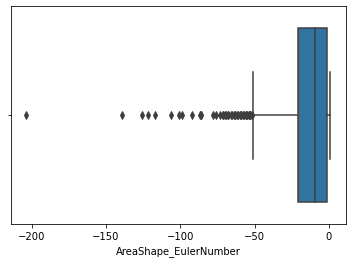

In [20]:
sns.boxplot(x=data_set.loc[:,'AreaShape_EulerNumber'])

<h3> Check the column names and select those we find interesting </h3>

In [5]:
data_set.columns

Index(['Condition', 'ImageNumber', 'AreaShape_Area',
       'AreaShape_BoundingBoxArea', 'AreaShape_BoundingBoxMaximum_X',
       'AreaShape_BoundingBoxMaximum_Y', 'AreaShape_BoundingBoxMinimum_X',
       'AreaShape_BoundingBoxMinimum_Y', 'AreaShape_Center_X',
       'AreaShape_Center_Y', 'AreaShape_Compactness', 'AreaShape_ConvexArea',
       'AreaShape_Eccentricity', 'AreaShape_EquivalentDiameter',
       'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor',
       'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter',
       'AreaShape_MaximumRadius', 'AreaShape_MeanRadius',
       'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter',
       'AreaShape_MinorAxisLength', 'AreaShape_Orientation',
       'AreaShape_Perimeter', 'AreaShape_Solidity', 'Location_Center_X',
       'Location_Center_Y', 'Location_Center_Z', 'Number_Object_Number',
       'Parent_Nuclei'],
      dtype='object')

In [6]:
X_input=data_set.drop(['Condition','ImageNumber','Location_Center_X','Location_Center_Y','Location_Center_Z','Number_Object_Number','Parent_Nuclei'],axis=1)

In [7]:
y_vector=data_set['Condition']

<h3> Random forest algorithm </h3>

<h4> Split the data into train and test </h4>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_input,y_vector,train_size=0.7,random_state=42)

In [10]:
print('Shape of train and test data is:')
X_train.shape, X_test.shape

Shape of train and test data is:


((762, 25), (327, 25))

<h4> Import RandomFOrestClassifier and fit the data </h4>

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10,
                                       n_estimators=100, oob_score=True)

In [13]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 554 ms


RandomForestClassifier(max_depth=10, n_jobs=-1, oob_score=True, random_state=42)

<h5> Check the oob score </h5>

In [42]:
classifier_rf.oob_score_

0.6666666666666666

<h4> Perform GridSearchCV for hyperparameter tuning </h4>

In [14]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [15]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 10,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [18]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min


Wall time: 1min 33s


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.5min finished


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

<h5> Best score of GridSearchCV </h5>

In [48]:
grid_search.best_score_

0.6705772940203913

<h5> save the best parameters from GridSearchCV </h5>

In [49]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

<h4> Visualize the decision tree </h4>

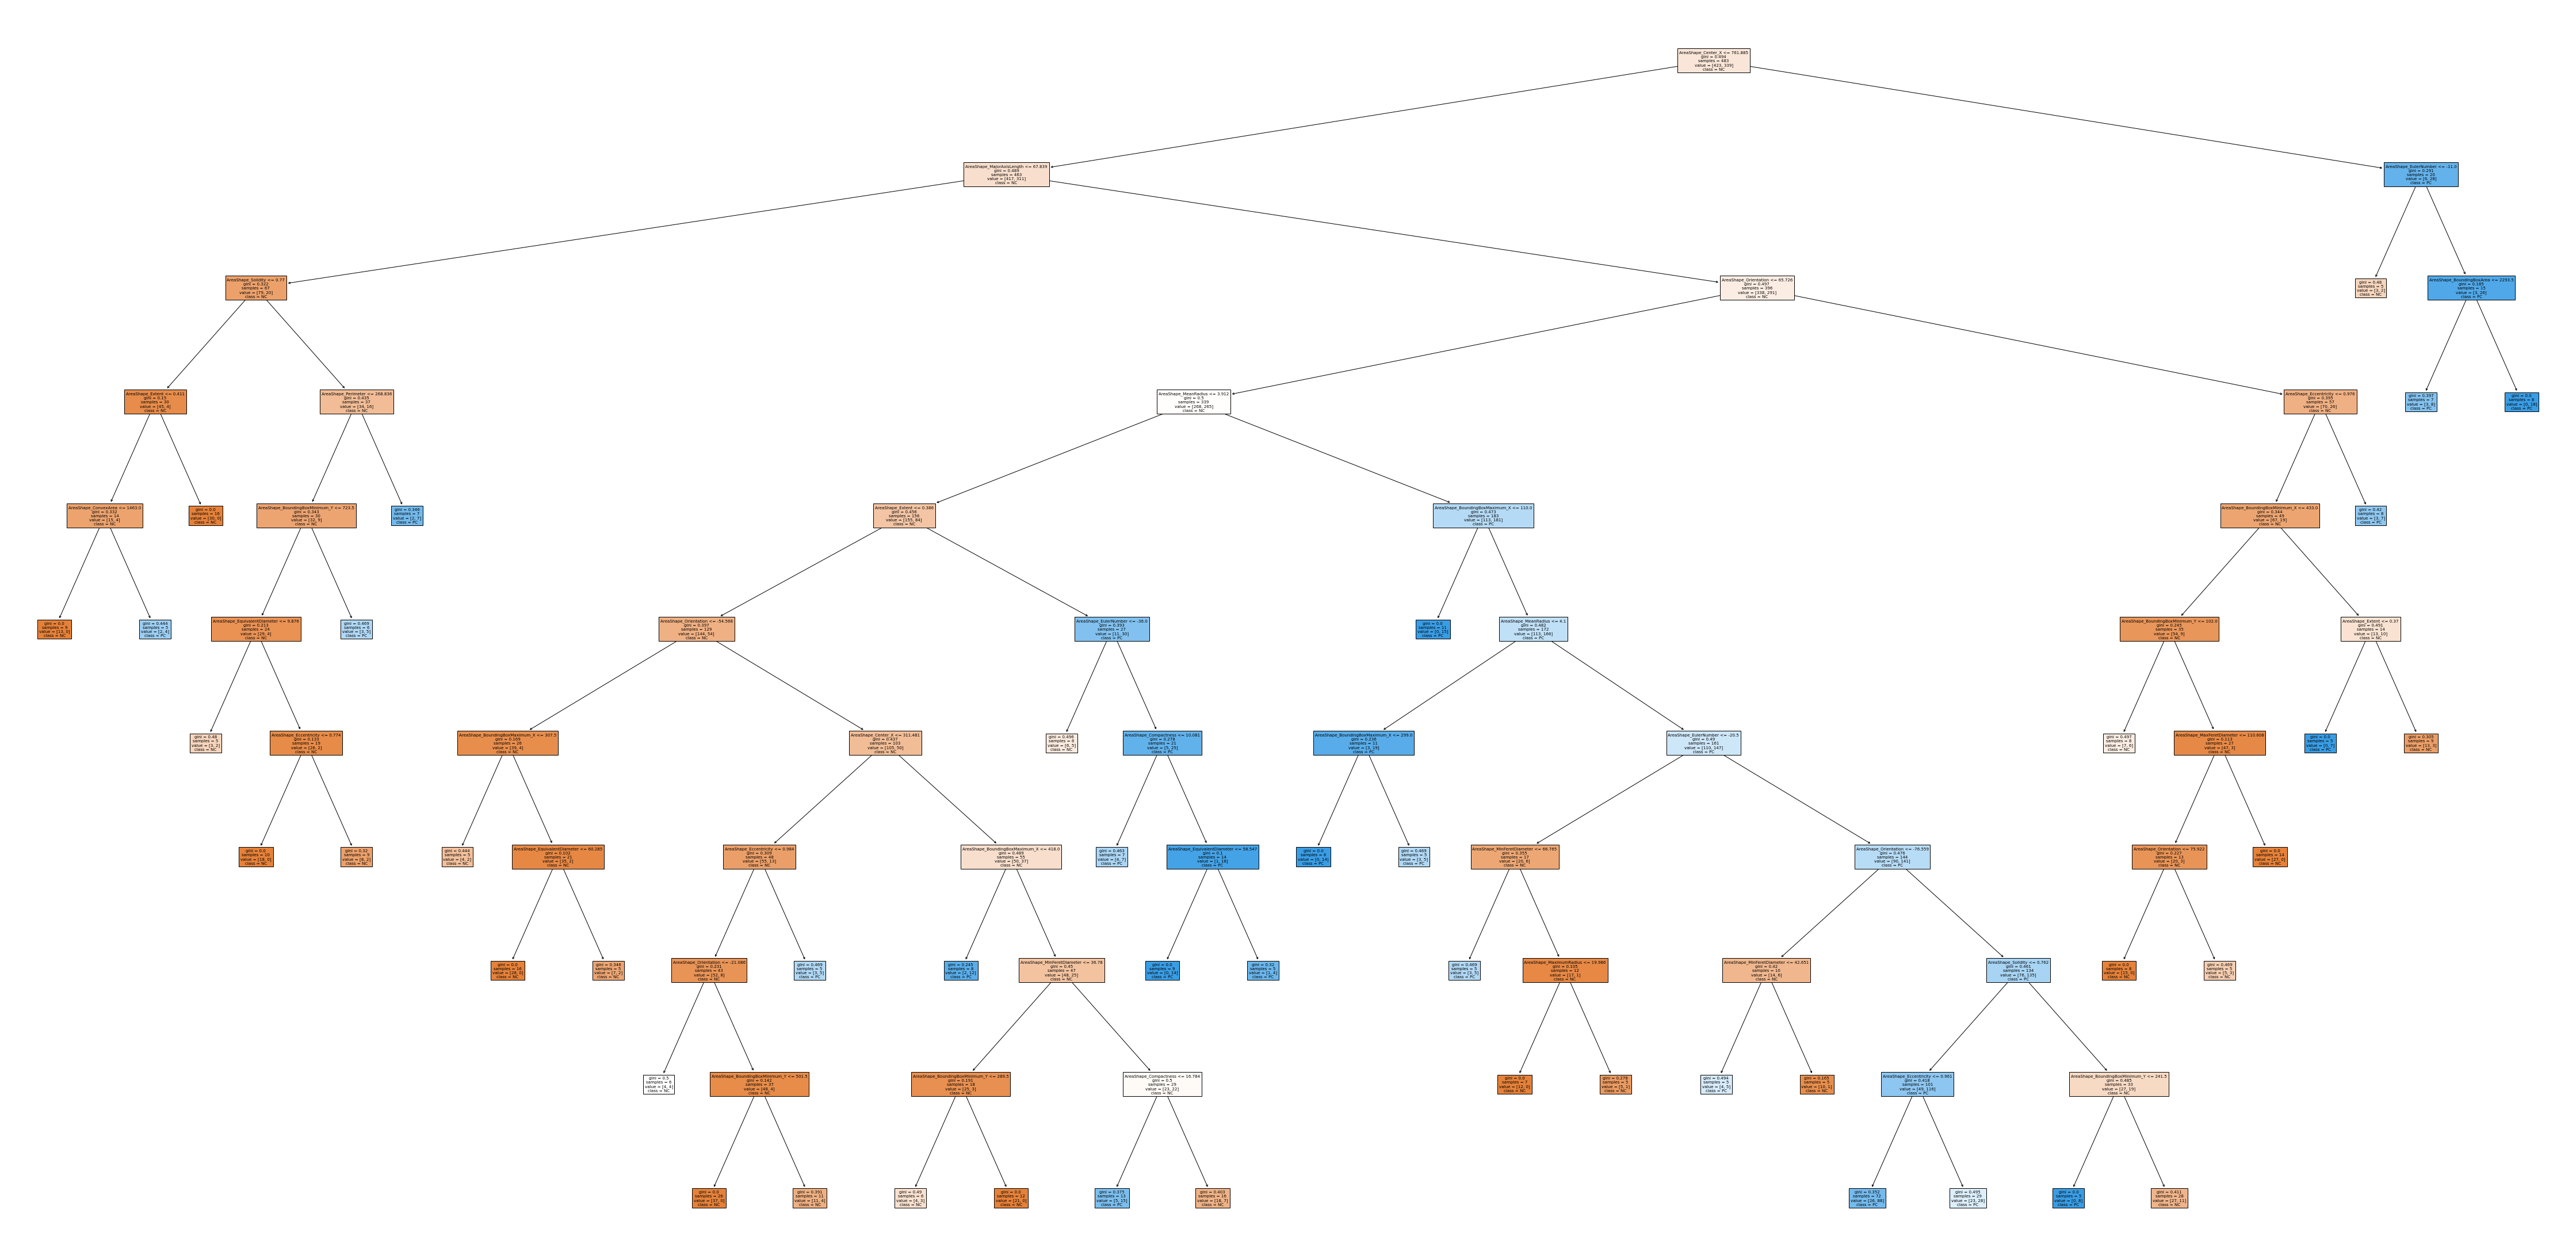

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X_input.columns,class_names=["NC",'PC'],filled=True);

<h4> Get the most important features </h4>

In [51]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
22,AreaShape_Orientation,0.069741
8,AreaShape_Compactness,0.062624
5,AreaShape_BoundingBoxMinimum_Y,0.054256
12,AreaShape_EulerNumber,0.050926
24,AreaShape_Solidity,0.048313
0,AreaShape_Area,0.047839
10,AreaShape_Eccentricity,0.044721
9,AreaShape_ConvexArea,0.044171
18,AreaShape_MeanRadius,0.040771
16,AreaShape_MaxFeretDiameter,0.040123
